In [4]:
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

%matplotlib inline

In [5]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = 'data/'  # Change me to store data elsewhere

In [6]:
def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent

In [7]:
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

In [8]:
train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified data/notMNIST_large.tar.gz
Found and verified data/notMNIST_small.tar.gz


In [ ]:
# TODO: skip extraction and read from tarfile

In [8]:
# num_classes = 10
# np.random.seed(133)
# 
# def maybe_extract(filename, force=False):
#   root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
#   if os.path.isdir(root) and not force:
#     # You may override by setting force=True.
#     print('%s already present - Skipping extraction of %s.' % (root, filename))
#   else:
#     print('Extracting data for %s. This may take a while. Please wait.' % root)
#     tar = tarfile.open(filename)
#     sys.stdout.flush()
#     tar.extractall(data_root)
#     tar.close()
#   data_folders = [
#     os.path.join(root, d) for d in sorted(os.listdir(root))
#     if os.path.isdir(os.path.join(root, d))]
#   if len(data_folders) != num_classes:
#     raise Exception(
#       'Expected %d folders, one per class. Found %d instead.' % (
#         num_classes, len(data_folders)))
#   print(data_folders)
#   return data_folders

In [9]:
# train_folders = maybe_extract(train_filename)
# test_folders = maybe_extract(test_filename)

data/notMNIST_large already present - Skipping extraction of data/notMNIST_large.tar.gz.
['data/notMNIST_large/A', 'data/notMNIST_large/B', 'data/notMNIST_large/C', 'data/notMNIST_large/D', 'data/notMNIST_large/E', 'data/notMNIST_large/F', 'data/notMNIST_large/G', 'data/notMNIST_large/H', 'data/notMNIST_large/I', 'data/notMNIST_large/J']
data/notMNIST_small already present - Skipping extraction of data/notMNIST_small.tar.gz.
['data/notMNIST_small/A', 'data/notMNIST_small/B', 'data/notMNIST_small/C', 'data/notMNIST_small/D', 'data/notMNIST_small/E', 'data/notMNIST_small/F', 'data/notMNIST_small/G', 'data/notMNIST_small/H', 'data/notMNIST_small/I', 'data/notMNIST_small/J']


In [10]:
# image_size = 28  # Pixel width and height.
# pixel_depth = 255.0  # Number of levels per pixel.
# 
# def load_letter(folder, min_num_images):
#   """Load the data for a single letter label."""
#   image_files = os.listdir(folder)
#   dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
#                          dtype=np.float32)
#   print(folder)
#   num_images = 0
#   for image in image_files:
#     image_file = os.path.join(folder, image)
#     try:
#       image_data = (imageio.imread(image_file).astype(float) - 
#                     pixel_depth / 2) / pixel_depth
#       if image_data.shape != (image_size, image_size):
#         raise Exception('Unexpected image shape: %s' % str(image_data.shape))
#       dataset[num_images, :, :] = image_data
#       num_images = num_images + 1
#     except (IOError, ValueError) as e:
#       print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
#     
#   dataset = dataset[0:num_images, :, :]
#   if num_images < min_num_images:
#     raise Exception('Many fewer images than expected: %d < %d' %
#                     (num_images, min_num_images))
#     
#   print('Full dataset tensor:', dataset.shape)
#   print('Mean:', np.mean(dataset))
#   print('Standard deviation:', np.std(dataset))
#   return dataset
#         
# def maybe_pickle(data_folders, min_num_images_per_class, force=False):
#   dataset_names = []
#   for folder in data_folders:
#     set_filename = folder + '.pickle'
#     dataset_names.append(set_filename)
#     if os.path.exists(set_filename) and not force:
#       # You may override by setting force=True.
#       print('%s already present - Skipping pickling.' % set_filename)
#     else:
#       print('Pickling %s.' % set_filename)
#       dataset = load_letter(folder, min_num_images_per_class)
#       try:
#         with open(set_filename, 'wb') as f:
#           pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
#       except Exception as e:
#         print('Unable to save data to', set_filename, ':', e)
#   
#   return dataset_names

In [11]:
# train_datasets = maybe_pickle(train_folders, 45000)
# test_datasets = maybe_pickle(test_folders, 1800)

data/notMNIST_large/A.pickle already present - Skipping pickling.
data/notMNIST_large/B.pickle already present - Skipping pickling.
data/notMNIST_large/C.pickle already present - Skipping pickling.
data/notMNIST_large/D.pickle already present - Skipping pickling.
data/notMNIST_large/E.pickle already present - Skipping pickling.
data/notMNIST_large/F.pickle already present - Skipping pickling.
data/notMNIST_large/G.pickle already present - Skipping pickling.
data/notMNIST_large/H.pickle already present - Skipping pickling.
data/notMNIST_large/I.pickle already present - Skipping pickling.
data/notMNIST_large/J.pickle already present - Skipping pickling.
data/notMNIST_small/A.pickle already present - Skipping pickling.
data/notMNIST_small/B.pickle already present - Skipping pickling.
data/notMNIST_small/C.pickle already present - Skipping pickling.
data/notMNIST_small/D.pickle already present - Skipping pickling.
data/notMNIST_small/E.pickle already present - Skipping pickling.
data/notMN

In [16]:
# def make_arrays(nb_rows, img_size):
#   if nb_rows:
#     dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
#     labels = np.ndarray(nb_rows, dtype=np.int32)
#   else:
#     dataset, labels = None, None
#   return dataset, labels
# 
# def merge_datasets(pickle_files, train_size, valid_size=0):
#   num_classes = len(pickle_files)
#   valid_dataset, valid_labels = make_arrays(valid_size, image_size)
#   train_dataset, train_labels = make_arrays(train_size, image_size)
#   vsize_per_class = valid_size // num_classes
#   tsize_per_class = train_size // num_classes
#     
#   start_v, start_t = 0, 0
#   end_v, end_t = vsize_per_class, tsize_per_class
#   end_l = vsize_per_class+tsize_per_class
#   for label, pickle_file in enumerate(pickle_files):       
#     try:
#       with open(pickle_file, 'rb') as f:
#         letter_set = pickle.load(f)
#         # let's shuffle the letters to have random validation and training set
#         np.random.shuffle(letter_set)
#         if valid_dataset is not None:
#           valid_letter = letter_set[:vsize_per_class, :, :]
#           valid_dataset[start_v:end_v, :, :] = valid_letter
#           valid_labels[start_v:end_v] = label
#           start_v += vsize_per_class
#           end_v += vsize_per_class
#                     
#         train_letter = letter_set[vsize_per_class:end_l, :, :]
#         train_dataset[start_t:end_t, :, :] = train_letter
#         train_labels[start_t:end_t] = label
#         start_t += tsize_per_class
#         end_t += tsize_per_class
#     except Exception as e:
#       print('Unable to process data from', pickle_file, ':', e)
#       raise
#     
#   return valid_dataset, valid_labels, train_dataset, train_labels

In [17]:
# train_size = 200000
# valid_size = 10000
# test_size = 10000
# 
# valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
#   train_datasets, train_size, valid_size)
# _, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)
# 
# print('Training:', train_dataset.shape, train_labels.shape)
# print('Validation:', valid_dataset.shape, valid_labels.shape)
# print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


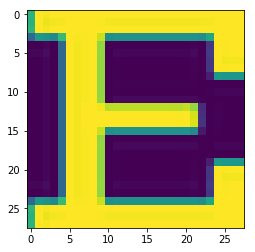

In [21]:
# plt.imshow(train_dataset[0])

In [22]:
# def randomize(dataset, labels):
#   permutation = np.random.permutation(labels.shape[0])
#   shuffled_dataset = dataset[permutation,:,:]
#   shuffled_labels = labels[permutation]
#   return shuffled_dataset, shuffled_labels
# 
# train_dataset, train_labels = randomize(train_dataset, train_labels)
# test_dataset, test_labels = randomize(test_dataset, test_labels)
# valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

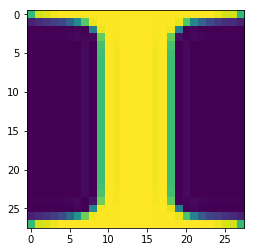

In [23]:
# plt.imshow(train_dataset[0])

In [ ]:
##########################################################################################

# Finally, let's save the data for later reuse:

In [9]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

In [24]:
# try:
#   f = open(pickle_file, 'wb')
#   save = {
#     'train_dataset': train_dataset,
#     'train_labels': train_labels,
#     'valid_dataset': valid_dataset,
#     'valid_labels': valid_labels,
#     'test_dataset': test_dataset,
#     'test_labels': test_labels,
#     }
#   pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
#   f.close()
# except Exception as e:
#   print('Unable to save data to', pickle_file, ':', e)
#   raise

In [10]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800512


In [18]:
try:
    with open(pickle_file, 'rb') as f:
        data_set = pickle.load(f)
except Exception as e:
    print('Unable to process data from', pickle_file, ':', e)
    raise

In [21]:
train_dataset = data_set['train_dataset']
train_labels = data_set['train_labels']
valid_dataset = data_set['valid_dataset']
valid_labels = data_set['valid_labels']
test_dataset = data_set['test_dataset']
test_labels = data_set['test_labels']